In [1]:
import pickle

import networkx as nx
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Concatenate, Dense, Embedding, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('new_filtered_df.pkl', 'rb') as f:
    new_filtered_df = pickle.load(f)
with open('adjacency_matrix.pkl', 'rb') as f:
    adj_matrix = pickle.load(f)

In [ ]:
new_filtered_df

,nhelpful,unixtime,work,user,stars,comment_embedding
0,0,1.332288e+09,73960,Elizabeth.Wong98,4.5,"[-77.46598688699305, -69.25408229976892, 161.2..."
1,0,1.253405e+09,69413,rivkat,3.0,"[-37.6312260273844, -13.38719025440514, 40.254..."
2,0,1.299888e+09,9523995,suz.haugland,4.0,"[-236.15096029639244, -229.50961085548624, 334..."
4,0,1.329005e+09,11243828,CandyH,4.0,"[-23.505829244852066, -50.01618693675846, 47.4..."
5,0,1.278893e+09,9071901,miyurose,2.0,"[-24.131364107131958, -33.410606890916824, 46...."
...,...,...,...,...,...,...
1707060,0,1.248048e+09,2129329,heidijane,4.0,"[-6.737696290016174, -5.548579812049866, 13.24..."
1707061,0,1.373242e+09,11234213,wyvernfriend,3.5,"[-44.68337908387184, -150.16408848483115, 70.0..."
1707062,0,1.330906e+09,87328,bookwormteri,2.0,"[-29.489345371723175, -40.38786921650171, 59.3..."
1707066,0,1.364688e+09,11749693,AmyMacEvilly,5.0,"[-27.5699595361948, -43.554710971191525, 73.58..."


node2vec

In [ ]:
edges_info = pd.read_csv('edges.txt', sep=" ", header=None)

In [ ]:
edges_info.shape

(219790, 2)

In [ ]:
edges_info.drop_duplicates(inplace=True)

In [ ]:
df_users = set(new_filtered_df.user)
edges_users = set(pd.concat([edges_info[0], edges_info[1]]))
common_users = df_users.intersection(edges_users)

In [ ]:
edges_info = edges_info[edges_info[0].isin(common_users)]
edges_info = edges_info[edges_info[1].isin(common_users)]

In [ ]:
edges_info.shape

(99706, 2)

In [ ]:
common_users

{'xmaystarx',
 'rebecca.days',
 'Amberborden1',
 'bailey67',
 'KRutherford',
 'NancyReagan',
 'MaryLou0',
 'imperfectmanx',
 'roethkegrrl',
 'kathydianeleveille',
 'royalsapphire',
 'RicketyCat',
 'hasko',
 'JaBu815',
 'vanhelsingboombox',
 'AgathaChristie',
 'cataylor',
 'deidzoeb',
 'ByTheBeatles',
 'DaristeiaD',
 'Read2Me2010',
 'mookie86',
 'readgrrl',
 'Hanno',
 'rdemarest',
 'rdingizsxy',
 'bookwurm84',
 'csanta40376',
 'spiphany',
 'oliviawilliams',
 'momtorghj',
 'Socially_Awkward',
 'rglossne',
 'fearless2012',
 'weecare',
 'emeraldpools',
 'djriave',
 'hammersen',
 'kittent',
 'Airycat',
 'Sarah_Butland',
 'afterlifewriter',
 'steve40004',
 'bigship',
 'DerekT.Rowswell',
 'ValNewHope',
 'nichtich',
 'justmeRosalie',
 'robinsone',
 'arielle13',
 'snifty',
 'horomnizon',
 'ZachXIII',
 'scorpiocurse',
 'juha',
 'JLHeim',
 'TinuvielDancing',
 'Devatipan',
 'sandhyas',
 'mementogorey',
 'Meijhen',
 'corys',
 'morningsidefamily',
 'charlespuskas',
 'lhlady',
 'markwinston',
 'Laura

In [ ]:
G = nx.Graph()
G.add_nodes_from(common_users)
for i, j in edges_info.values:
    if i in common_users and j in common_users:
        G.add_edge(i,j)

In [ ]:
len(G.edges)

63187

In [ ]:
G.edges

In [ ]:
nx.is_connected(G)

False

In [ ]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G_m = G.subgraph(Gcc[0])
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[18161,
 68,
 56,
 54,
 46,
 41,
 24,
 17,
 17,
 16,
 15,
 14,
 13,
 12,
 12,
 12,
 12,
 11,
 10,
 10,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 

In [ ]:
len(G_m)

18161

In [ ]:
G_m.nodes

NodeView(('xmaystarx', 'rebecca.days', 'bailey67', 'KRutherford', 'NancyReagan', 'MaryLou0', 'imperfectmanx', 'kathydianeleveille', 'royalsapphire', 'RicketyCat', 'JaBu815', 'vanhelsingboombox', 'AgathaChristie', 'cataylor', 'deidzoeb', 'DaristeiaD', 'Read2Me2010', 'mookie86', 'readgrrl', 'Hanno', 'rdemarest', 'bookwurm84', 'spiphany', 'oliviawilliams', 'momtorghj', 'rglossne', 'fearless2012', 'weecare', 'emeraldpools', 'djriave', 'hammersen', 'kittent', 'Airycat', 'Sarah_Butland', 'afterlifewriter', 'bigship', 'DerekT.Rowswell', 'ValNewHope', 'nichtich', 'justmeRosalie', 'robinsone', 'arielle13', 'horomnizon', 'scorpiocurse', 'juha', 'JLHeim', 'TinuvielDancing', 'mementogorey', 'Meijhen', 'morningsidefamily', 'charlespuskas', 'lhlady', 'markwinston', 'MDennison', 'sinshenlong', 'ledge', 'ironicqueery', 'bsquaredsf', 'NickBrooke', 'Anbigin', 'tura62', 'saraLlewellyn', 'armccarthy', 'gigib88', 'Montserratmv', 'writerlibrarian', 'GustavoG', 'johnbakeronline', 'thehistorychic', 'hashford'

In [ ]:
len(set(G_m.nodes).intersection(common_users))

18161

In [ ]:
user_to_index = {}
index_to_user = {}
for i, user in enumerate(G_m.nodes):
    user_to_index[user] = i
    index_to_user[i] = user

In [ ]:
edge_string = '\n'.join('{} {}'.format(user_to_index[i[0]], user_to_index[i[1]]) for i, _ in G_m.edges.items())

In [ ]:
edge_string

'0 15032\n0 256\n0 17345\n0 9716\n0 13488\n0 4630\n0 16407\n0 4651\n0 4266\n0 6644\n0 8139\n0 14646\n0 1068\n1 6306\n2 707\n3 1296\n4 1970\n5 7470\n6 16898\n6 11742\n6 11909\n6 13443\n6 9603\n7 18094\n7 803\n7 1098\n7 13664\n7 2518\n7 1197\n7 13255\n7 1447\n7 16015\n7 12201\n7 3027\n7 13223\n7 6544\n7 16490\n7 6471\n7 3369\n7 11700\n7 6986\n7 9565\n7 4643\n7 6000\n7 16312\n7 5196\n7 763\n8 10169\n9 78\n9 1304\n9 17378\n9 13308\n9 533\n9 4469\n9 12097\n9 9521\n9 16311\n9 14091\n9 17042\n9 14588\n9 15607\n9 5989\n9 17552\n9 6859\n9 2648\n10 1044\n11 866\n12 9515\n12 13432\n13 13504\n13 13677\n13 4448\n13 2841\n13 3943\n13 4543\n14 16974\n15 6982\n16 1258\n16 4965\n17 9262\n18 16452\n19 3792\n20 2844\n20 7579\n21 1827\n22 4164\n22 3119\n22 9313\n22 12302\n22 5365\n22 3481\n22 3417\n22 11768\n23 6568\n23 15008\n24 1290\n24 14290\n24 3412\n24 11048\n24 12166\n24 124\n24 12004\n24 4041\n24 8123\n24 2673\n25 17189\n25 13677\n26 9496\n26 3326\n26 3910\n26 6141\n26 3322\n26 16099\n27 13424\n28 

In [ ]:
with open('edge_string_new.txt', 'w') as f:
    f.write(edge_string)

Generating embeddings:

I am using node2vec to generate node embeddings.

In [ ]:
!python3 node2vec/src/main.py --input edge_string_new.txt --output node_embeddings.emd

Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10


In [ ]:
node_emb = pd.read_csv('node_embeddings.emd', header=None, sep = ' ', skiprows=1)

In [ ]:
node_emb.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,4643,-0.073289,-0.297807,0.088399,-0.004579,-0.074160,-0.311518,0.117180,-0.179695,-0.278005,...,0.089477,0.066594,0.117950,-0.041907,0.117550,-0.072120,-0.002598,-0.126784,0.050157,0.135479
1,13677,0.001230,0.251781,0.161323,-0.031779,0.117730,-0.016047,0.198161,-0.059236,0.096469,...,0.300438,-0.139034,0.234555,0.007549,-0.194946,0.056004,-0.121682,-0.230821,-0.352186,-0.029083
2,3446,0.134687,-0.416167,0.168923,-0.037609,0.010112,-0.065496,-0.020935,0.131737,-0.113557,...,0.250018,-0.209640,-0.170384,-0.277213,-0.429349,0.100697,0.472827,0.131084,0.251496,0.288134
3,10329,0.164880,0.105639,0.264398,0.264080,-0.006956,-0.178408,-0.197172,0.013337,-0.168128,...,0.230600,-0.031261,-0.259169,-0.249168,0.057452,0.023045,-0.216646,0.072639,-0.215164,-0.043668
4,763,0.151634,-0.405521,-0.455391,-0.217294,-0.201211,-0.147732,-0.219620,-0.163486,-0.118126,...,0.195315,0.037766,0.141203,0.094408,-0.159189,-0.050441,-0.215367,-0.372702,-0.009491,-0.417107


In [ ]:
node_emb

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,4643,-0.073289,-0.297807,0.088399,-0.004579,-0.074160,-0.311518,0.117180,-0.179695,-0.278005,...,0.089477,0.066594,0.117950,-0.041907,0.117550,-0.072120,-0.002598,-0.126784,0.050157,0.135479
1,13677,0.001230,0.251781,0.161323,-0.031779,0.117730,-0.016047,0.198161,-0.059236,0.096469,...,0.300438,-0.139034,0.234555,0.007549,-0.194946,0.056004,-0.121682,-0.230821,-0.352186,-0.029083
2,3446,0.134687,-0.416167,0.168923,-0.037609,0.010112,-0.065496,-0.020935,0.131737,-0.113557,...,0.250018,-0.209640,-0.170384,-0.277213,-0.429349,0.100697,0.472827,0.131084,0.251496,0.288134
3,10329,0.164880,0.105639,0.264398,0.264080,-0.006956,-0.178408,-0.197172,0.013337,-0.168128,...,0.230600,-0.031261,-0.259169,-0.249168,0.057452,0.023045,-0.216646,0.072639,-0.215164,-0.043668
4,763,0.151634,-0.405521,-0.455391,-0.217294,-0.201211,-0.147732,-0.219620,-0.163486,-0.118126,...,0.195315,0.037766,0.141203,0.094408,-0.159189,-0.050441,-0.215367,-0.372702,-0.009491,-0.417107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18156,17120,0.481323,-0.575685,-0.013573,-0.004544,-0.062416,0.275543,-0.112896,-0.450371,-0.239691,...,0.190756,0.302524,0.151498,0.174313,-0.119137,0.279757,-0.055728,0.461207,0.144212,0.044189
18157,11,-0.067047,-0.194318,-0.161985,-0.055398,0.365039,0.116671,0.041167,-0.137920,-0.103912,...,0.145905,0.006063,0.158401,-0.532491,-0.284314,-0.019946,-0.245340,0.261006,0.108824,-0.056838
18158,15939,0.275822,0.112612,-0.256324,0.416881,-0.003179,-0.367203,-0.062699,-0.200089,-0.140091,...,0.088666,0.291481,-0.127641,-0.073173,-0.191057,0.160905,0.185446,-0.083532,0.034119,0.037393
18159,6862,-0.004980,-0.366075,-0.359070,0.430848,0.202876,0.093388,0.271907,-0.331375,-0.239118,...,-0.021733,0.115435,-0.095482,-0.111799,0.235444,0.164659,-0.137834,0.214817,0.226747,0.168563


The generated embeddings are of the form:
`node_id dim1 dim2 ... dimd`


In [ ]:
new_filtered_df

,nhelpful,unixtime,work,user,stars,comment_embedding
0,0,1.332288e+09,73960,Elizabeth.Wong98,4.5,"[-77.46598688699305, -69.25408229976892, 161.2..."
1,0,1.253405e+09,69413,rivkat,3.0,"[-37.6312260273844, -13.38719025440514, 40.254..."
2,0,1.299888e+09,9523995,suz.haugland,4.0,"[-236.15096029639244, -229.50961085548624, 334..."
4,0,1.329005e+09,11243828,CandyH,4.0,"[-23.505829244852066, -50.01618693675846, 47.4..."
5,0,1.278893e+09,9071901,miyurose,2.0,"[-24.131364107131958, -33.410606890916824, 46...."
...,...,...,...,...,...,...
1707060,0,1.248048e+09,2129329,heidijane,4.0,"[-6.737696290016174, -5.548579812049866, 13.24..."
1707061,0,1.373242e+09,11234213,wyvernfriend,3.5,"[-44.68337908387184, -150.16408848483115, 70.0..."
1707062,0,1.330906e+09,87328,bookwormteri,2.0,"[-29.489345371723175, -40.38786921650171, 59.3..."
1707066,0,1.364688e+09,11749693,AmyMacEvilly,5.0,"[-27.5699595361948, -43.554710971191525, 73.58..."


In [ ]:
main_df = new_filtered_df[new_filtered_df['user'].isin(G_m.nodes)]

In [ ]:
main_df

,nhelpful,unixtime,work,user,stars,comment_embedding
0,0,1.332288e+09,73960,Elizabeth.Wong98,4.5,"[-77.46598688699305, -69.25408229976892, 161.2..."
1,0,1.253405e+09,69413,rivkat,3.0,"[-37.6312260273844, -13.38719025440514, 40.254..."
2,0,1.299888e+09,9523995,suz.haugland,4.0,"[-236.15096029639244, -229.50961085548624, 334..."
4,0,1.329005e+09,11243828,CandyH,4.0,"[-23.505829244852066, -50.01618693675846, 47.4..."
5,0,1.278893e+09,9071901,miyurose,2.0,"[-24.131364107131958, -33.410606890916824, 46...."
...,...,...,...,...,...,...
1707060,0,1.248048e+09,2129329,heidijane,4.0,"[-6.737696290016174, -5.548579812049866, 13.24..."
1707061,0,1.373242e+09,11234213,wyvernfriend,3.5,"[-44.68337908387184, -150.16408848483115, 70.0..."
1707062,0,1.330906e+09,87328,bookwormteri,2.0,"[-29.489345371723175, -40.38786921650171, 59.3..."
1707066,0,1.364688e+09,11749693,AmyMacEvilly,5.0,"[-27.5699595361948, -43.554710971191525, 73.58..."


In [ ]:
n_main_df = main_df.drop(['nhelpful'], axis=1)

In [ ]:
n_main_df.user = n_main_df.user.progress_apply(lambda x: user_to_index[x])

  0%|          | 0/836543 [00:00<?, ?it/s]

In [ ]:
n_main_df

,unixtime,work,user,stars,comment_embedding
0,1.332288e+09,73960,10802,4.5,"[-77.46598688699305, -69.25408229976892, 161.2..."
1,1.253405e+09,69413,9105,3.0,"[-37.6312260273844, -13.38719025440514, 40.254..."
2,1.299888e+09,9523995,4081,4.0,"[-236.15096029639244, -229.50961085548624, 334..."
4,1.329005e+09,11243828,1985,4.0,"[-23.505829244852066, -50.01618693675846, 47.4..."
5,1.278893e+09,9071901,12282,2.0,"[-24.131364107131958, -33.410606890916824, 46...."
...,...,...,...,...,...
1707060,1.248048e+09,2129329,12986,4.0,"[-6.737696290016174, -5.548579812049866, 13.24..."
1707061,1.373242e+09,11234213,15287,3.5,"[-44.68337908387184, -150.16408848483115, 70.0..."
1707062,1.330906e+09,87328,10892,2.0,"[-29.489345371723175, -40.38786921650171, 59.3..."
1707066,1.364688e+09,11749693,17951,5.0,"[-27.5699595361948, -43.554710971191525, 73.58..."


In [ ]:
n_main_df.dtypes

unixtime             float64
work                  object
user                   int64
stars                float64
comment_embedding     object
dtype: object

In [ ]:
n_main_df.work = n_main_df.work.astype(int)

In [ ]:
n_main_df.unixtime.min()

-86400.0

In [ ]:
n_main_df.unixtime.value_counts()[-86400]

1301

In [ ]:
sorted(n_main_df.unixtime.unique())

[-86400.0,
 1124582400.0,
 1124668800.0,
 1124928000.0,
 1125014400.0,
 1125360000.0,
 1125446400.0,
 1125705600.0,
 1125878400.0,
 1125964800.0,
 1126051200.0,
 1126137600.0,
 1126224000.0,
 1126310400.0,
 1126396800.0,
 1126483200.0,
 1126569600.0,
 1126656000.0,
 1126742400.0,
 1126828800.0,
 1126915200.0,
 1127001600.0,
 1127088000.0,
 1127174400.0,
 1127260800.0,
 1127347200.0,
 1127433600.0,
 1127520000.0,
 1127606400.0,
 1127692800.0,
 1127779200.0,
 1127865600.0,
 1127952000.0,
 1128038400.0,
 1128124800.0,
 1128211200.0,
 1128297600.0,
 1128384000.0,
 1128470400.0,
 1128556800.0,
 1128643200.0,
 1128729600.0,
 1128816000.0,
 1128902400.0,
 1128988800.0,
 1129075200.0,
 1129161600.0,
 1129248000.0,
 1129334400.0,
 1129420800.0,
 1129507200.0,
 1129593600.0,
 1129680000.0,
 1129766400.0,
 1129852800.0,
 1129939200.0,
 1130025600.0,
 1130112000.0,
 1130198400.0,
 1130284800.0,
 1130371200.0,
 1130457600.0,
 1130544000.0,
 1130630400.0,
 1130716800.0,
 1130803200.0,
 1130889600.0,

We see that the earliest unixtime for a user review is -86400. This seems much earlier in comparison to other reviews. Below, I convert the two earliest, and the latest unix timestamps to dates.

In [ ]:
from datetime import datetime
ts1 = int('-86400')
ts2 = int('1124582400')
ts3 = int(n_main_df.unixtime.max())

In [ ]:
print(datetime.utcfromtimestamp(ts1).strftime('%Y-%m-%d %H:%M:%S'))
print(datetime.utcfromtimestamp(ts2).strftime('%Y-%m-%d %H:%M:%S'))
print(datetime.utcfromtimestamp(ts3).strftime('%Y-%m-%d %H:%M:%S'))

1969-12-31 00:00:00
2005-08-21 00:00:00
2013-08-26 00:00:00


The reviews from 1969 are clearly mislabelled. I will replace these by the median.

In [ ]:
n_main_df.unixtime.median()

1280966400.0

In [ ]:
n_main_df.unixtime.replace(-86400, n_main_df.unixtime.median(), inplace=True)

In [ ]:
n_main_df.unixtime.max() - n_main_df.unixtime.min()

252892800.0

Due to the large range, we cannot directly encode the timestamps. Each time stamp corresponds to midnight of the day in the dataset.

In [ ]:
# number of seconds in a day
24*60*60

86400

In [ ]:
(n_main_df.unixtime%86400 == 0).all()

True

Dividing the timestamps by 86400 will significantly reduce the range.

In [ ]:
n_main_df.unixtime = n_main_df.unixtime.progress_apply(lambda x: x/86400)

  0%|          | 0/836543 [00:00<?, ?it/s]

In [ ]:
n_main_df.unixtime.max() - n_main_df.unixtime.min()

2927.0

With the reduced range of unixtime values, we can now create embeddings.

In [5]:
in_user_dim = 18160 + 1
in_work_dim = 14192194 + 1
in_unixtime_dim = int(15943 + 1)

In [3]:
latent_out_dim = 16
def nn_model():
    # Input Layers
    user_input = Input(name='user_input', shape=[1])
    work_input = Input(name='work_input', shape=[1])
    unixtime_input = Input(name='unixtime_input', shape=[1])
    comment_input = Input(name='comment_input', shape=[100])
    node_emb_input = Input(name='node_emb_input', shape=[128])
    # Embedding Layers
    user_emb = Embedding(name='user_emb', embeddings_regularizer=regularizers.L2(0),
                         input_dim=in_user_dim, output_dim=latent_out_dim)(user_input)
    work_emb = Embedding(name='work_emb', embeddings_regularizer=regularizers.L2(0),
                         input_dim=in_work_dim, output_dim=latent_out_dim)(work_input)
    unixtime_emb = Embedding(name='unixtime_emb', embeddings_regularizer=regularizers.L2(0),
                             input_dim=in_unixtime_dim, output_dim=latent_out_dim)(unixtime_input)
    
    flat_user_emb = Flatten()(user_emb)
    flat_work_emb = Flatten()(work_emb)
    flat_unixtime_emb = Flatten()(unixtime_emb)
    
    x = Concatenate()([flat_user_emb, flat_work_emb, flat_unixtime_emb, comment_input, node_emb_input])
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    x = Dense(8, activation='relu')(x)
    x = Dense(1)(x)
    
    model = Model(inputs=[user_input, work_input, unixtime_input, comment_input, node_emb_input], outputs=x)
    model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [6]:
model = nn_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 work_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 unixtime_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 user_emb (Embedding)           (None, 1, 16)        290576      ['user_input[0][0]']             
                                                                                              

In [ ]:
node_emb.set_index(0, inplace=True)

In [ ]:
node_emb

,1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
0,,,,,,,,,,,,,,,,,,,,,
4643,-0.073289,-0.297807,0.088399,-0.004579,-0.074160,-0.311518,0.117180,-0.179695,-0.278005,0.137824,...,0.089477,0.066594,0.117950,-0.041907,0.117550,-0.072120,-0.002598,-0.126784,0.050157,0.135479
13677,0.001230,0.251781,0.161323,-0.031779,0.117730,-0.016047,0.198161,-0.059236,0.096469,0.162962,...,0.300438,-0.139034,0.234555,0.007549,-0.194946,0.056004,-0.121682,-0.230821,-0.352186,-0.029083
3446,0.134687,-0.416167,0.168923,-0.037609,0.010112,-0.065496,-0.020935,0.131737,-0.113557,0.103875,...,0.250018,-0.209640,-0.170384,-0.277213,-0.429349,0.100697,0.472827,0.131084,0.251496,0.288134
10329,0.164880,0.105639,0.264398,0.264080,-0.006956,-0.178408,-0.197172,0.013337,-0.168128,0.288649,...,0.230600,-0.031261,-0.259169,-0.249168,0.057452,0.023045,-0.216646,0.072639,-0.215164,-0.043668
763,0.151634,-0.405521,-0.455391,-0.217294,-0.201211,-0.147732,-0.219620,-0.163486,-0.118126,-0.071582,...,0.195315,0.037766,0.141203,0.094408,-0.159189,-0.050441,-0.215367,-0.372702,-0.009491,-0.417107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,0.481323,-0.575685,-0.013573,-0.004544,-0.062416,0.275543,-0.112896,-0.450371,-0.239691,0.036565,...,0.190756,0.302524,0.151498,0.174313,-0.119137,0.279757,-0.055728,0.461207,0.144212,0.044189
11,-0.067047,-0.194318,-0.161985,-0.055398,0.365039,0.116671,0.041167,-0.137920,-0.103912,0.428141,...,0.145905,0.006063,0.158401,-0.532491,-0.284314,-0.019946,-0.245340,0.261006,0.108824,-0.056838
15939,0.275822,0.112612,-0.256324,0.416881,-0.003179,-0.367203,-0.062699,-0.200089,-0.140091,0.260750,...,0.088666,0.291481,-0.127641,-0.073173,-0.191057,0.160905,0.185446,-0.083532,0.034119,0.037393


In [ ]:
node_emb.loc[3640].tolist()

[0.086757384,
 -0.089618795,
 0.23055717,
 0.18732886,
 -0.1176528,
 0.1375736,
 0.07768764,
 0.21065162,
 -0.0040238714,
 0.08329393,
 0.41852614,
 -0.28792742,
 0.5732433,
 -0.15889546,
 0.43261507,
 0.21506065,
 -0.05435986,
 0.22588347,
 0.14756127,
 0.08070328,
 0.46091744,
 -0.42959246,
 -0.6137023,
 -0.26424745,
 -0.52887374,
 -0.37180245,
 0.19394971,
 0.11221673,
 0.56424046,
 0.26233062,
 -0.006095005,
 0.09831049,
 -0.26284572,
 0.16952056,
 0.3190706,
 -0.19792634,
 -0.061572418,
 -0.09849857,
 -0.2069915,
 0.5733986,
 0.067100905,
 0.43858355,
 0.029411063,
 -0.50151193,
 0.28757778,
 -0.07158441,
 0.011278232,
 0.6775729,
 -0.2525641,
 -0.2500243,
 0.24449222,
 0.9324428,
 -0.20624286,
 0.29273376,
 -0.13660407,
 -0.264047,
 -0.21912564,
 -0.19152656,
 -0.3401339,
 -0.16261186,
 0.045039713,
 0.16951197,
 0.09953847,
 -0.3373743,
 0.55774325,
 0.12648675,
 -0.39367795,
 0.056570955,
 -0.46209994,
 -0.14817508,
 -0.43012267,
 0.08411786,
 -0.28588745,
 -0.06937349,
 -0.035

In [ ]:
n_main_df['node_embedding'] = n_main_df.user.progress_apply(lambda x: node_emb.loc[x].tolist())

  0%|          | 0/836543 [00:00<?, ?it/s]

In [ ]:
n_main_df

,unixtime,work,user,stars,comment_embedding,node_embedding
0,15420.0,73960,10802,4.5,"[-77.46598688699305, -69.25408229976892, 161.2...","[-0.069694325, -0.65703154, 0.021926664, 0.354..."
1,14507.0,69413,9105,3.0,"[-37.6312260273844, -13.38719025440514, 40.254...","[-0.01433251, -0.20400274, 0.14872277, 0.40130..."
2,15045.0,9523995,4081,4.0,"[-236.15096029639244, -229.50961085548624, 334...","[0.0396514, -0.21119404, -0.25171566, -0.30565..."
4,15382.0,11243828,1985,4.0,"[-23.505829244852066, -50.01618693675846, 47.4...","[0.3777335, -0.30516464, -0.062337957, 0.12744..."
5,14802.0,9071901,12282,2.0,"[-24.131364107131958, -33.410606890916824, 46....","[-0.07292033, -0.2139442, 0.27819517, -0.02664..."
...,...,...,...,...,...,...
1707060,14445.0,2129329,12986,4.0,"[-6.737696290016174, -5.548579812049866, 13.24...","[0.024454711, -0.2801552, -0.07883119, 0.10473..."
1707061,15894.0,11234213,15287,3.5,"[-44.68337908387184, -150.16408848483115, 70.0...","[0.28239632, -0.41360474, 0.2820353, 0.2864586..."
1707062,15404.0,87328,10892,2.0,"[-29.489345371723175, -40.38786921650171, 59.3...","[-0.07531021, 0.06280776, 0.061203215, 0.29007..."
1707066,15795.0,11749693,17951,5.0,"[-27.5699595361948, -43.554710971191525, 73.58...","[0.33530316, -0.15598685, 0.019048482, -0.3649..."


In [ ]:
n_main_df[['user', 'work', 'unixtime', 'comment_embedding', 'node_embedding']]

,user,work,unixtime,comment_embedding,node_embedding
0,10802,73960,15420.0,"[-77.46598688699305, -69.25408229976892, 161.2...","[-0.069694325, -0.65703154, 0.021926664, 0.354..."
1,9105,69413,14507.0,"[-37.6312260273844, -13.38719025440514, 40.254...","[-0.01433251, -0.20400274, 0.14872277, 0.40130..."
2,4081,9523995,15045.0,"[-236.15096029639244, -229.50961085548624, 334...","[0.0396514, -0.21119404, -0.25171566, -0.30565..."
4,1985,11243828,15382.0,"[-23.505829244852066, -50.01618693675846, 47.4...","[0.3777335, -0.30516464, -0.062337957, 0.12744..."
5,12282,9071901,14802.0,"[-24.131364107131958, -33.410606890916824, 46....","[-0.07292033, -0.2139442, 0.27819517, -0.02664..."
...,...,...,...,...,...
1707060,12986,2129329,14445.0,"[-6.737696290016174, -5.548579812049866, 13.24...","[0.024454711, -0.2801552, -0.07883119, 0.10473..."
1707061,15287,11234213,15894.0,"[-44.68337908387184, -150.16408848483115, 70.0...","[0.28239632, -0.41360474, 0.2820353, 0.2864586..."
1707062,10892,87328,15404.0,"[-29.489345371723175, -40.38786921650171, 59.3...","[-0.07531021, 0.06280776, 0.061203215, 0.29007..."
1707066,17951,11749693,15795.0,"[-27.5699595361948, -43.554710971191525, 73.58...","[0.33530316, -0.15598685, 0.019048482, -0.3649..."


In [ ]:
X = n_main_df[['user', 'work', 'unixtime', 'comment_embedding', 'node_embedding']].copy()
y = n_main_df.stars

In [ ]:
X.comment_embedding = X.comment_embedding.progress_apply(lambda x: np.asarray(x).astype('float32'))
X.node_embedding = X.node_embedding.progress_apply(lambda x: np.asarray(x).astype('float32'))

  0%|          | 0/836543 [00:00<?, ?it/s]

  0%|          | 0/836543 [00:00<?, ?it/s]

In [ ]:
X.comment_embedding

0          [-77.46599, -69.25408, 161.25908, -55.571384, ...
1          [-37.631226, -13.38719, 40.254616, -40.57157, ...
2          [-236.15096, -229.50961, 334.28464, -79.14534,...
4          [-23.505829, -50.016186, 47.42697, -23.659115,...
5          [-24.131365, -33.410606, 46.357666, -35.79118,...
                                 ...                        
1707060    [-6.737696, -5.5485797, 13.249588, 1.1425391, ...
1707061    [-44.68338, -150.1641, 70.08411, -46.888725, 1...
1707062    [-29.489346, -40.38787, 59.38762, -27.336494, ...
1707066    [-27.56996, -43.55471, 73.589005, 21.561005, 1...
1707069    [-51.109447, -116.05664, 59.40388, -50.575573,...
Name: comment_embedding, Length: 836543, dtype: object

In [ ]:
np.asarray(X.comment_embedding.tolist()).reshape(-1, 100)

array([[ -77.46599  ,  -69.25408  ,  161.25908  , ...,   84.49339  ,
          13.147173 , -166.89694  ],
       [ -37.631226 ,  -13.38719  ,   40.254616 , ...,   27.503502 ,
          22.076311 ,  -30.128036 ],
       [-236.15096  , -229.50961  ,  334.28464  , ...,  172.18335  ,
          -1.8914859, -160.18752  ],
       ...,
       [ -29.489346 ,  -40.38787  ,   59.38762  , ...,   43.776554 ,
           1.2732499,  -13.565729 ],
       [ -27.56996  ,  -43.55471  ,   73.589005 , ...,   91.54877  ,
          20.776443 ,   -3.876592 ],
       [ -51.109447 , -116.05664  ,   59.40388  , ...,   28.953724 ,
         -20.661152 ,  -74.02978  ]], dtype=float32)

In [ ]:
X.node_embedding

0          [-0.069694325, -0.65703154, 0.021926664, 0.354...
1          [-0.01433251, -0.20400274, 0.14872277, 0.40130...
2          [0.0396514, -0.21119404, -0.25171566, -0.30565...
4          [0.3777335, -0.30516464, -0.062337957, 0.12744...
5          [-0.07292033, -0.2139442, 0.27819517, -0.02664...
                                 ...                        
1707060    [0.024454711, -0.2801552, -0.07883119, 0.10473...
1707061    [0.28239632, -0.41360474, 0.2820353, 0.2864586...
1707062    [-0.07531021, 0.06280776, 0.061203215, 0.29007...
1707066    [0.33530316, -0.15598685, 0.019048482, -0.3649...
1707069    [0.10840158, -0.44908732, 0.094249524, -0.1756...
Name: node_embedding, Length: 836543, dtype: object

In [ ]:
np.asarray(X.node_embedding.tolist()).reshape(-1, 128)

array([[-6.9694325e-02, -6.5703154e-01,  2.1926664e-02, ...,
         2.0106837e-01,  3.9248180e-01, -1.5680510e-01],
       [-1.4332510e-02, -2.0400274e-01,  1.4872277e-01, ...,
         4.2748887e-02,  1.3642946e-01, -3.0176732e-01],
       [ 3.9651401e-02, -2.1119404e-01, -2.5171566e-01, ...,
         4.2955008e-01,  2.5626343e-01,  5.0558928e-02],
       ...,
       [-7.5310208e-02,  6.2807761e-02,  6.1203215e-02, ...,
         6.5381522e-04, -1.6951580e-01,  1.7941451e-01],
       [ 3.3530316e-01, -1.5598685e-01,  1.9048482e-02, ...,
        -2.6240849e-01, -5.3828222e-01, -6.0544908e-01],
       [ 1.0840158e-01, -4.4908732e-01,  9.4249524e-02, ...,
        -3.1620362e-01, -1.5274399e-02, -1.4480799e-01]], dtype=float32)

In [ ]:
X_array = np.concatenate([
    np.asarray(X.user).astype(np.float32).reshape(-1, 1),
    np.asarray(X.work).astype(np.float32).reshape(-1, 1),
    np.asarray(X.unixtime).astype(np.float32).reshape(-1, 1),
    np.asarray(X.comment_embedding.tolist()).reshape(-1, 100),
    np.asarray(X.node_embedding.tolist()).reshape(-1, 128)], axis=-1)

In [ ]:
X_array.shape

(836543, 231)

In [ ]:
X

,user,work,unixtime,comment_embedding,node_embedding
0,10802,73960,15420.0,"[-77.46599, -69.25408, 161.25908, -55.571384, ...","[-0.069694325, -0.65703154, 0.021926664, 0.354..."
1,9105,69413,14507.0,"[-37.631226, -13.38719, 40.254616, -40.57157, ...","[-0.01433251, -0.20400274, 0.14872277, 0.40130..."
2,4081,9523995,15045.0,"[-236.15096, -229.50961, 334.28464, -79.14534,...","[0.0396514, -0.21119404, -0.25171566, -0.30565..."
4,1985,11243828,15382.0,"[-23.505829, -50.016186, 47.42697, -23.659115,...","[0.3777335, -0.30516464, -0.062337957, 0.12744..."
5,12282,9071901,14802.0,"[-24.131365, -33.410606, 46.357666, -35.79118,...","[-0.07292033, -0.2139442, 0.27819517, -0.02664..."
...,...,...,...,...,...
1707060,12986,2129329,14445.0,"[-6.737696, -5.5485797, 13.249588, 1.1425391, ...","[0.024454711, -0.2801552, -0.07883119, 0.10473..."
1707061,15287,11234213,15894.0,"[-44.68338, -150.1641, 70.08411, -46.888725, 1...","[0.28239632, -0.41360474, 0.2820353, 0.2864586..."
1707062,10892,87328,15404.0,"[-29.489346, -40.38787, 59.38762, -27.336494, ...","[-0.07531021, 0.06280776, 0.061203215, 0.29007..."
1707066,17951,11749693,15795.0,"[-27.56996, -43.55471, 73.589005, 21.561005, 1...","[0.33530316, -0.15598685, 0.019048482, -0.3649..."


In [ ]:
with open('X_array.pkl', 'wb') as f:
    pickle.dump(X_array, f)
with open('y.pkl', 'wb') as f:
    pickle.dump(y, f)

In [7]:
with open('/content/drive/MyDrive/X_array.pkl', 'rb') as f:
    X_array = pickle.load(f)
with open('/content/drive/MyDrive/y.pkl', 'rb') as f:
    y = pickle.load(f)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_array, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(669234, 231) (167309, 231) (669234,) (167309,)


In [10]:
X_train1, X_val, y_train1, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, shuffle=True, stratify=y_train)

In [10]:
X_train1.shape

(535387, 231)

In [27]:
del 

NameError: ignored

In [11]:
batch_size = 1000
history = model.fit(
    x=[X_train1[:,0], X_train1[:,1], X_train1[:,2], X_train1[:,3:103], X_train1[:, 103:]],
    y=y_train1/5, batch_size=batch_size, epochs=10, verbose=1,
    validation_data=([X_val[:,0], X_val[:,1], X_val[:,2], X_val[:,3:103], X_val[:, 103:]], y_val/5))
# model.save_weights('NCF_with_meta.h5')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:459: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 227075120 elements. This may consume a large amount of memory.
  warnings.warn(


536/536 [==============================] - 46s 67ms/step - loss: 2.4076 - root_mean_squared_error: 1.5517 - val_loss: 0.1286 - val_root_mean_squared_error: 0.3585
Epoch 2/10
536/536 [==============================] - 34s 64ms/step - loss: 0.0797 - root_mean_squared_error: 0.2824 - val_loss: 0.0581 - val_root_mean_squared_error: 0.2411
Epoch 3/10
536/536 [==============================] - 36s 67ms/step - loss: 0.0491 - root_mean_squared_error: 0.2217 - val_loss: 0.0442 - val_root_mean_squared_error: 0.2103
Epoch 4/10
536/536 [==============================] - 34s 64ms/step - loss: 0.0389 - root_mean_squared_error: 0.1971 - val_loss: 0.0372 - val_root_mean_squared_error: 0.1929
Epoch 5/10
536/536 [==============================] - 36s 67ms/step - loss: 0.0339 - root_mean_squared_error: 0.1842 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1860
Epoch 6/10
536/536 [==============================] - 36s 67ms/step - loss: 0.0295 - root_mean_squared_error: 0.1717 - val_loss: 0.0437 - val

In [12]:
pred_input = [X_test[:,0], X_test[:,1], X_test[:,2], X_test[:,3:103], X_test[:, 103:]]
test_pred = model.predict_on_batch(pred_input)
test_pred


array([[0.99358964],
       [0.81332207],
       [0.7645514 ],
       ...,
       [0.866276  ],
       [0.77962327],
       [0.7812979 ]], dtype=float32)

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
mean_squared_error(y_test/5, test_pred, squared=False)

0.17901594875515991

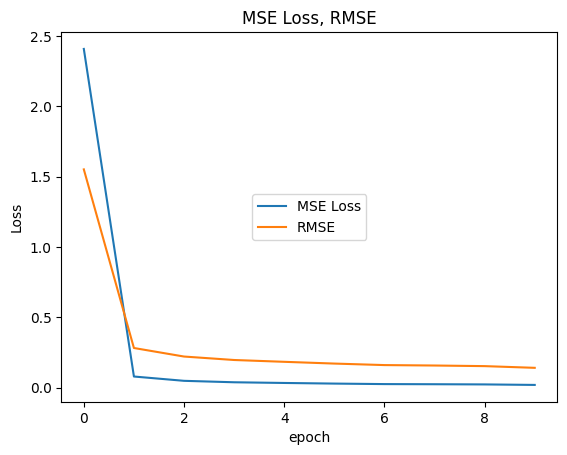

In [17]:
from matplotlib import pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["root_mean_squared_error"])
plt.title("MSE Loss, RMSE")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend(["MSE Loss", "RMSE"], loc="center")
plt.show()

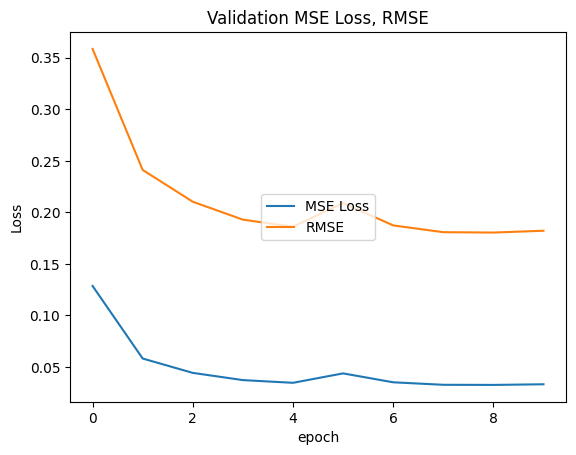

In [19]:
from matplotlib import pyplot as plt

plt.plot(history.history["val_loss"])
plt.plot(history.history["val_root_mean_squared_error"])
plt.title("Validation MSE Loss, RMSE")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend(["MSE Loss", "RMSE"], loc="center")
plt.show()